#PET FINDER
UFUK CEM BIRBIRI

Data Science & Artificial Intelligence Master

Universite Cote d'Azur, France




This notebook is about data analysis of an animal shelter where we predict if the animals you have in your possession can be adopted within 30 days or not.

The dataset contains information about cats and dogs with other features like breed, fee, gender, color...
Lets's load the dataset and investigate some features:


In [8]:
#Some imports
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

path = "https://www.i3s.unice.fr/~riveill/dataset/petfinder-adoption-prediction/"

colors = pd.read_csv(path+'color_labels.csv')
states = pd.read_csv(path+'state_labels.csv')
breeds = pd.read_csv(path+'breed_labels.csv')
#LOAD TRAIN DATA
train =  pd.read_csv(path+'train.csv')
train['dataset_type'] = 'train'

#LOAD TEST DATA
test = pd.read_csv(path+"test.csv")
test['dataset_type'] = 'test'
y_test = test['target']
X_test = test.drop(['target','dataset_type'], axis=1)

#All data
all_data = pd.concat([train,test])

See the columns of the dataset:

In [ ]:
train.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'Images', 'Breed', 'target', 'dataset_type'],
      dtype='object')

See the size of the dataset and data types:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          8168 non-null   object 
 1   Age           8168 non-null   float64
 2   Gender        8168 non-null   object 
 3   Color1        8168 non-null   object 
 4   Color2        8168 non-null   object 
 5   Color3        8168 non-null   object 
 6   MaturitySize  8168 non-null   object 
 7   FurLength     8168 non-null   object 
 8   Vaccinated    8168 non-null   object 
 9   Dewormed      8168 non-null   object 
 10  Sterilized    8168 non-null   object 
 11  Health        8168 non-null   object 
 12  Fee           8168 non-null   float64
 13  Description   8168 non-null   object 
 14  Images        8168 non-null   object 
 15  Breed         8168 non-null   object 
 16  target        8168 non-null   bool   
 17  dataset_type  8168 non-null   object 
dtypes: bool(1), float64(2), obje

#####NOTE:
Before starting to this notebook, there are 3 installations you should do (if they are not installed):

In [114]:
#1. Categorical encoding for categorical columns:

#!pip install category-encoders

In [113]:
#2. Sentiment analyisis with VADER:

#!pip install vaderSentiment

In [115]:
#3. Opencv for image column:

#!pip install opencv-contrib-python==4.4.0.44

#DATA ANALYSIS



##1 - TYPE

Dog    4904
Cat    3264
Name: Type, dtype: int64


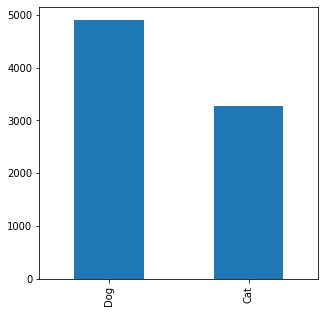

In [ ]:
print(train.Type.value_counts())
train['Type'].value_counts().plot(kind='bar', figsize=(5,5))

We see that the rate of dogs in the training set is a bit higher. Though, it is not as much as we worry.

Dog    154
Cat     96
Name: Type, dtype: int64


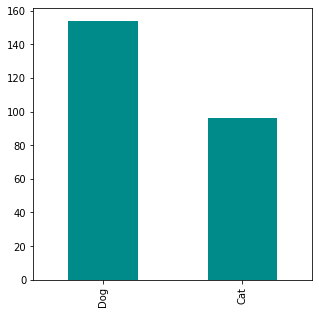

In [ ]:
print(test.Type.value_counts())
test['Type'].value_counts().plot(kind='bar', figsize=(5,5), color='darkcyan')


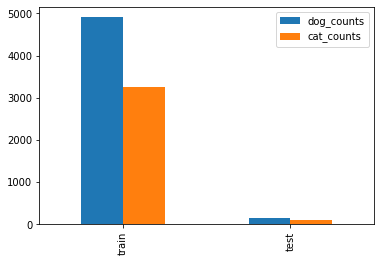

In [ ]:
types= ["train", "test"]
dog_counts = [train.Type.value_counts()[0], test.Type.value_counts()[0]]
cat_counts = [train.Type.value_counts()[1], test.Type.value_counts()[1]]
df = pd.DataFrame({'dog_counts': dog_counts,'cat_counts': cat_counts}, index=types)
ax = df.plot.bar()

Let's analysize the proportion of how likely pets will get adopted in 30 days. 'True' means the pet will be adopted in 30 days and false is the opposite.

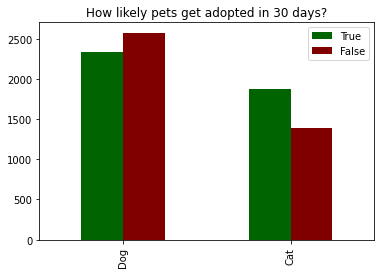

In [ ]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]

types= ["Dog", "Cat"]
# True = The pet can be adopted in 30 days
trues = [len(train_dog[train_dog.target== True]), 
         len(train_cat[train_cat.target== True])]
# False = The pet can be adopted in 30 days
falses = [len(train_dog[train_dog.target== False]), 
          len(train_cat[train_cat.target== False])]
df = pd.DataFrame({'True': trues,'False': falses}, index=types)
ax = df.plot.bar(color =["Darkgreen","Maroon"], 
                 title="How likely pets get adopted in 30 days?")

We see that cats are more likely to be adopted than dogs because 'True' count is greater than 'False' count in cats.

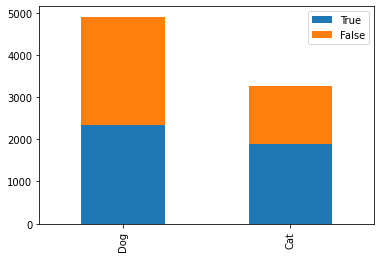

In [ ]:
df.plot(kind='bar', stacked=True)


##2 - AGE

Now, look at Age variable

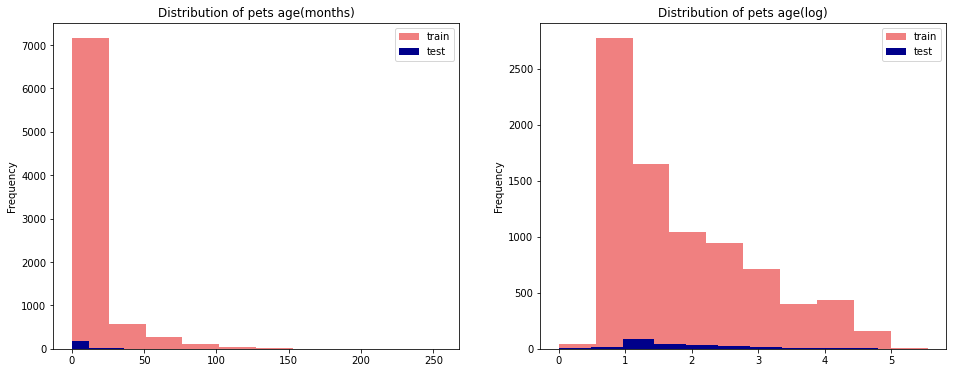

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Distribution of pets age(months)")
train.Age.plot(kind='hist',label='train',color=["lightcoral"])
test.Age.plot(kind='hist',label='test',color=["darkblue"])
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of pets age(log)")
np.log1p(train["Age"]).plot(kind='hist',label='train',color=["lightcoral"])
np.log1p(test["Age"]).plot(kind='hist',label='test',color=["darkblue"])
plt.legend()

In [ ]:
train.Age.value_counts().head(10)

2.0     1769
3.0     1030
1.0     1004
4.0      618
12.0     599
24.0     407
5.0      337
6.0      336
36.0     261
8.0      199
Name: Age, dtype: int64

The age is shown in months. We can see that most pets are young in trainin dataset. Some ages are multiple of 12 that means people are not sure about pet's age.

In [ ]:
test.Age.value_counts().head(10)

2.0     54
3.0     32
4.0     31
12.0    17
24.0    13
5.0     13
1.0     12
6.0     11
8.0      8
7.0      6
Name: Age, dtype: int64

The distribution of age is not so bad in testing data.

##3 - COLOR
We have 3 color columns in data dataset and 7 different color. If the value is 'Unknow', it means there is no color.

In [ ]:
colors

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [ ]:
print(train.Color1.unique())
print(train.Color2.unique())
print(train.Color3.unique())

['White' 'Golden' 'Black' 'Cream' 'Yellow' 'Brown' 'Gray']
['Unknown' 'White' 'Golden' 'Gray' 'Brown' 'Cream' 'Yellow']
['Unknown' 'White' 'Cream' 'Gray' 'Golden' 'Yellow']


###### Colors in training dataset

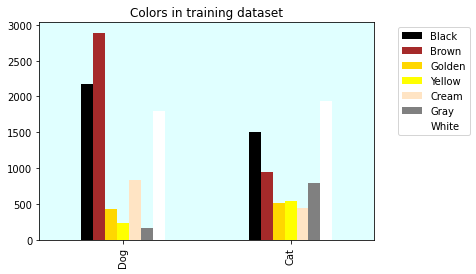

In [ ]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]
types= ["Dog", "Cat"]
Black = [len(train_dog[train_dog.Color1== 'Black'])+
         len(train_dog[train_dog.Color2== 'Black'])+
         len(train_dog[train_dog.Color3== 'Black']), 
         len(train_cat[train_cat.Color1== 'Black'])+
         len(train_cat[train_cat.Color2== 'Black'])+
         len(train_cat[train_cat.Color3== 'Black'])]

Brown = [len(train_dog[train_dog.Color1== 'Brown'])+
         len(train_dog[train_dog.Color2== 'Brown'])+
         len(train_dog[train_dog.Color3== 'Brown']), 
         len(train_cat[train_cat.Color1== 'Brown'])+
         len(train_cat[train_cat.Color2== 'Brown'])+
         len(train_cat[train_cat.Color3== 'Brown'])]

Golden = [len(train_dog[train_dog.Color1== 'Golden'])+
         len(train_dog[train_dog.Color2== 'Golden'])+
         len(train_dog[train_dog.Color3== 'Golden']), 
         len(train_cat[train_cat.Color1== 'Golden'])+
         len(train_cat[train_cat.Color2== 'Golden'])+
         len(train_cat[train_cat.Color3== 'Golden'])]

Yellow = [len(train_dog[train_dog.Color1== 'Yellow'])+
         len(train_dog[train_dog.Color2== 'Yellow'])+
         len(train_dog[train_dog.Color3== 'Yellow']), 
         len(train_cat[train_cat.Color1== 'Yellow'])+
         len(train_cat[train_cat.Color2== 'Yellow'])+
         len(train_cat[train_cat.Color3== 'Yellow'])]

Cream = [len(train_dog[train_dog.Color1== 'Cream'])+
         len(train_dog[train_dog.Color2== 'Cream'])+
         len(train_dog[train_dog.Color3== 'Cream']), 
         len(train_cat[train_cat.Color1== 'Cream'])+
         len(train_cat[train_cat.Color2== 'Cream'])+
         len(train_cat[train_cat.Color3== 'Cream'])]

Gray = [len(train_dog[train_dog.Color1== 'Gray'])+
         len(train_dog[train_dog.Color2== 'Gray'])+
         len(train_dog[train_dog.Color3== 'Gray']), 
         len(train_cat[train_cat.Color1== 'Gray'])+
         len(train_cat[train_cat.Color2== 'Gray'])+
         len(train_cat[train_cat.Color3== 'Gray'])]

White = [len(train_dog[train_dog.Color1== 'White'])+
         len(train_dog[train_dog.Color2== 'White'])+
         len(train_dog[train_dog.Color3== 'White']), 
         len(train_cat[train_cat.Color1== 'White'])+
         len(train_cat[train_cat.Color2== 'White'])+
         len(train_cat[train_cat.Color3== 'White'])]
df = pd.DataFrame({'Black': Black,'Brown': Brown,'Golden': Golden,
                   'Yellow': Yellow,'Cream': Cream,'Gray': Gray,
                   'White': White}, index=types)

ax = df.plot(kind='bar', color =["Black",'Brown','gold','Yellow','bisque',
                         'Gray','White'], 
                 title="Colors in training dataset")
ax.legend(bbox_to_anchor=(1.3, 1))
ax.set_facecolor('lightcyan')

We see that brown, white and black are most popular colors in both cats and dogs. 




###### Colors in testing dataset

Now let's see the colors in testing data:

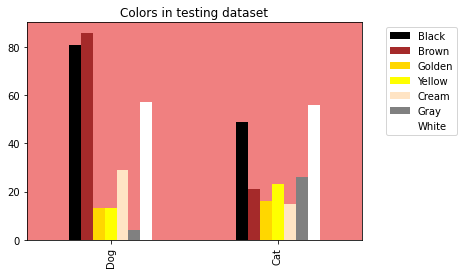

In [ ]:
test_dog = test[test['Type'] == "Dog" ]
test_cat = test[test['Type'] == "Cat" ]
types= ["Dog", "Cat"]
Black = [len(test_dog[test_dog.Color1== 'Black'])+
         len(test_dog[test_dog.Color2== 'Black'])+
         len(test_dog[test_dog.Color3== 'Black']), 
         len(test_cat[test_cat.Color1== 'Black'])+
         len(test_cat[test_cat.Color2== 'Black'])+
         len(test_cat[test_cat.Color3== 'Black'])]

Brown = [len(test_dog[test_dog.Color1== 'Brown'])+
         len(test_dog[test_dog.Color2== 'Brown'])+
         len(test_dog[test_dog.Color3== 'Brown']), 
         len(test_cat[test_cat.Color1== 'Brown'])+
         len(test_cat[test_cat.Color2== 'Brown'])+
         len(test_cat[test_cat.Color3== 'Brown'])]

Golden = [len(test_dog[test_dog.Color1== 'Golden'])+
         len(test_dog[test_dog.Color2== 'Golden'])+
         len(test_dog[test_dog.Color3== 'Golden']), 
         len(test_cat[test_cat.Color1== 'Golden'])+
         len(test_cat[test_cat.Color2== 'Golden'])+
         len(test_cat[test_cat.Color3== 'Golden'])]

Yellow = [len(test_dog[test_dog.Color1== 'Yellow'])+
         len(test_dog[test_dog.Color2== 'Yellow'])+
         len(test_dog[test_dog.Color3== 'Yellow']), 
         len(test_cat[test_cat.Color1== 'Yellow'])+
         len(test_cat[test_cat.Color2== 'Yellow'])+
         len(test_cat[test_cat.Color3== 'Yellow'])]

Cream = [len(test_dog[test_dog.Color1== 'Cream'])+
         len(test_dog[test_dog.Color2== 'Cream'])+
         len(test_dog[test_dog.Color3== 'Cream']), 
         len(test_cat[test_cat.Color1== 'Cream'])+
         len(test_cat[test_cat.Color2== 'Cream'])+
         len(test_cat[test_cat.Color3== 'Cream'])]

Gray = [len(test_dog[test_dog.Color1== 'Gray'])+
         len(test_dog[test_dog.Color2== 'Gray'])+
         len(test_dog[test_dog.Color3== 'Gray']), 
         len(test_cat[test_cat.Color1== 'Gray'])+
         len(test_cat[test_cat.Color2== 'Gray'])+
         len(test_cat[test_cat.Color3== 'Gray'])]

White = [len(test_dog[test_dog.Color1== 'White'])+
         len(test_dog[test_dog.Color2== 'White'])+
         len(test_dog[test_dog.Color3== 'White']), 
         len(test_cat[test_cat.Color1== 'White'])+
         len(test_cat[test_cat.Color2== 'White'])+
         len(test_cat[test_cat.Color3== 'White'])]
df = pd.DataFrame({'Black': Black,'Brown': Brown,'Golden': Golden,
                   'Yellow': Yellow,'Cream': Cream,'Gray': Gray,
                   'White': White}, index=types)

ax = df.plot(kind='bar', color =["Black",'Brown','gold','Yellow','bisque',
                         'Gray','White'], 
                 title="Colors in testing dataset")
ax.legend(bbox_to_anchor=(1.3, 1))

ax.set_facecolor('lightcoral')

The color distribution varies in testing set. Again white, brown and black are most common colors.

**IDEA:** 
If the Color1, Color2 and Color3 are correlated each other, we can remove the most correlated one. Let's test this idea and see the correlation matrix of colors:

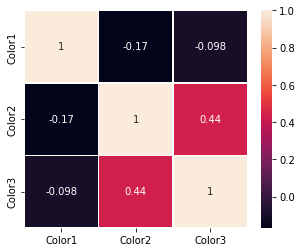

In [ ]:
import seaborn as sn

cor_color= train[['Color1','Color2','Color3']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig, ax = plt.subplots(figsize=(5,4))         # Sample figsize in inches
sn.heatmap(cor_color, annot=True, linewidths=.5, ax=ax)

Color2 and Color3 are correlated as 0.44 but that is not enough. We should get at least 0.80 for strong correlation. So colors are not correlated with each other.

##4 - GENDER

Make a quick analysize for Gender

Text(0.5, 0, 'CATS')

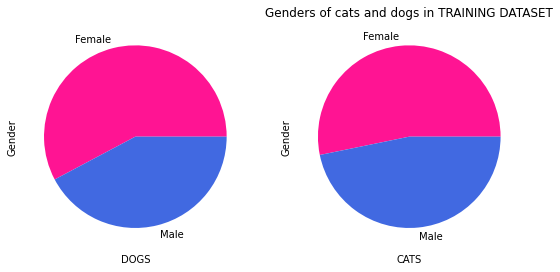

In [ ]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))  # 1 row, 2 columns
plt.title("Genders of cats and dogs in TRAINING DATASET")
train_dog['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax1,colors = ['deeppink', 'royalblue'])
train_cat['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax2,colors = ['deeppink', 'royalblue'])
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')


Females and males are almost equal in cats. There are more female in dogs but not in a problematic way. Gender distributions are OK in both cats and dogs.

Now, let's see the gender proportions in testing dataset:

Text(0.5, 0, 'CATS')

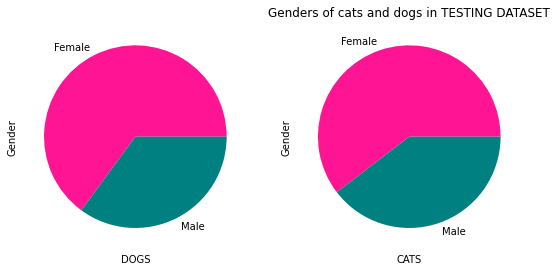

In [ ]:
test_dog = test[test['Type'] == "Dog" ]
test_cat = test[test['Type'] == "Cat" ]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))  # 1 row, 2 columns
plt.title("Genders of cats and dogs in TESTING DATASET")
test_dog['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax1,colors = ['deeppink', 'teal'])
test_cat['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax2,colors = ['deeppink', 'teal'])
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

The gender distribution in test data is not bad. Females are greater in cats and dogs however the difference is not huge.

##5 - Vaccinated, Dewormed, Sterilized and Health

Vaccination status, being dewormed,sterilization and health are important features for adoption. Let's analyse.




First, look at the correlation matrix

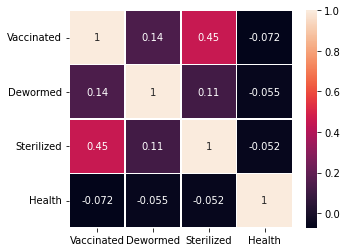

In [ ]:
corr_health= train[['Vaccinated', 'Dewormed', 'Sterilized', 'Health']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig, ax = plt.subplots(figsize=(5,4))        
sn.heatmap(corr_health, annot=True, linewidths=.5, ax=ax)

They are not correlated with each other at all. In my opinion, healthy pets will be adopted more. Let's test this.



There are three options in Health column: Healthy, Minor Injury and Serious Injury. 

Healthy           7873
Minor Injury       280
Serious Injury      15
Name: Health, dtype: int64


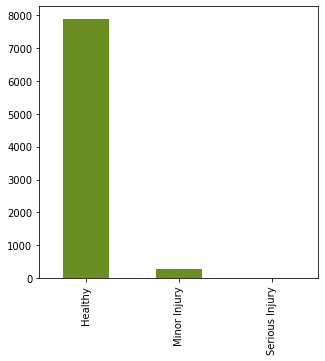

In [ ]:
print(train.Health.value_counts())
train['Health'].value_counts().plot(kind='bar', figsize=(5,5), 
                                    color="olivedrab")

Most pets are healthy in the training dataset. How about test data?



Healthy         245
Minor Injury      5
Name: Health, dtype: int64


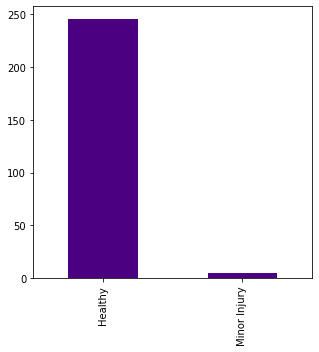

In [ ]:
print(test.Health.value_counts())
test['Health'].value_counts().plot(kind='bar', figsize=(5,5), 
                                    color="indigo")

There is no 'Serious Injury' category in test data. It is ok because it is very less in the training data.



How about the Health condition and the adaptation? 

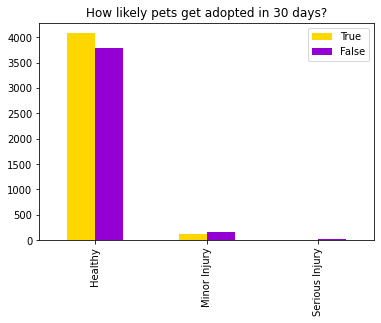

In [ ]:
train_healthy = train[train['Health'] == "Healthy" ]
train_minor = train[train['Health'] == "Minor Injury" ]
train_serious = train[train['Health'] == "Serious Injury" ]

types= ["Healthy", "Minor Injury","Serious Injury"]

trues = [len(train_healthy[train_healthy.target== True]), 
         len(train_minor[train_minor.target== True]),
         len(train_serious[train_serious.target== True])]
# False = The pet can NOT be adopted in 30 days
falses = [len(train_healthy[train_healthy.target== False]), 
         len(train_minor[train_minor.target== False]),
         len(train_serious[train_serious.target== False])]
df = pd.DataFrame({'True': trues,'False': falses}, index=types)
ax = df.plot.bar(color =["gold","darkviolet"], 
                 title="How likely pets get adopted in 30 days?")

Results show that if a pet is healthy, there is no quarantee that it will get adopted. Let's make this analysis with vaccination. There are 3 types in this column: Unknown, No, Yes.

In [ ]:
train.Vaccinated.value_counts()

Yes        3742
No         3409
Unknown    1017
Name: Vaccinated, dtype: int64

Let's plot these 3 types and see how the pets' adaption is affected:

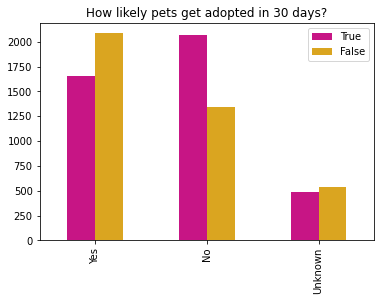

In [ ]:
train_vac = train[train['Vaccinated'] == "Yes" ]
train_not_vac = train[train['Vaccinated'] == "No" ]
train_unknown = train[train['Vaccinated'] == "Unknown" ]

types= ["Yes", "No","Unknown"]

trues = [len(train_vac[train_vac.target== True]), 
         len(train_not_vac[train_not_vac.target== True]),
         len(train_unknown[train_unknown.target== True])]
# False = The pet can be adopted in 30 days
falses = [len(train_vac[train_vac.target== False]), 
         len(train_not_vac[train_not_vac.target== False]),
         len(train_unknown[train_unknown.target== False])]
df = pd.DataFrame({'True': trues,'False': falses}, index=types)
ax = df.plot.bar(color =["mediumvioletred","goldenrod"], 
                 title="How likely pets get adopted in 30 days?")

Interestingly people prefer not-vaccinated pets more. Maybe they want to start vaccination from zero and take them to vets themselves.

##6 - BREED

In [ ]:
train.Breed.value_counts().head(10)

Mixed_Breed             3437
Domestic_Short_Hair     1694
Domestic_Medium_Hair     599
Tabby                    174
Siamese                  159
Shih_Tzu                 132
Labrador_Retriever       129
Domestic_Long_Hair       129
Persian                  124
Poodle                   118
Name: Breed, dtype: int64

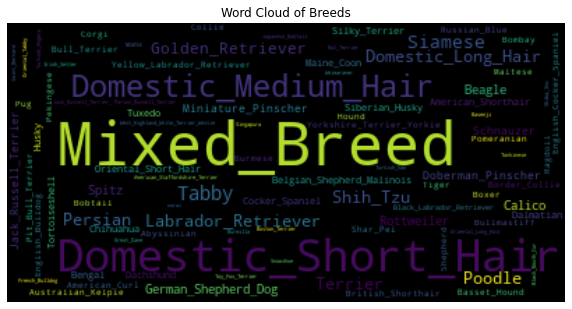

In [ ]:
from wordcloud import WordCloud 

all_breeds=""
for i in range(len(train.Breed)):
  all_breeds = all_breeds + train.Breed[i]
  all_breeds = all_breeds + " "
wordcloud = WordCloud().generate(all_breeds)
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.set_title('Word Cloud of Breeds')
plt.axis("off")
plt.show()

##7 - Fee

In [ ]:
train.Fee.value_counts().head(10)

0.0      6754
50.0      265
100.0     253
200.0     140
150.0     103
20.0       98
300.0      76
250.0      55
30.0       54
80.0       42
Name: Fee, dtype: int64

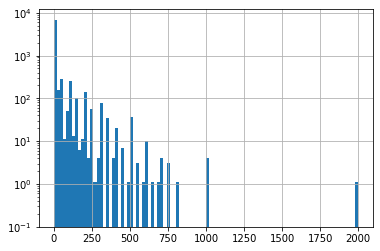

In [ ]:
fig, ax = plt.subplots()
train.Fee.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

##8- MaturitySize

In [ ]:
train.MaturitySize.value_counts()

Medium         5711
Small          1700
Large           736
Extra Large      21
Name: MaturitySize, dtype: int64

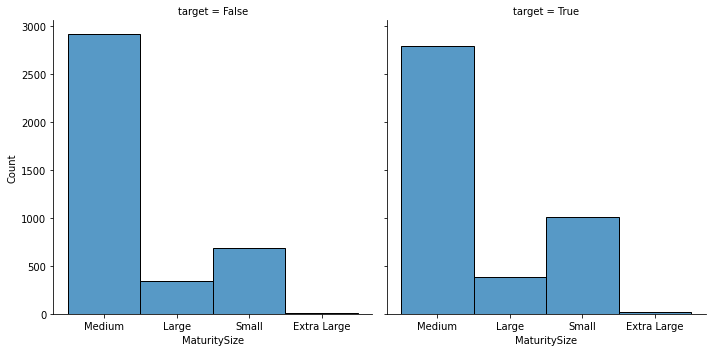

In [ ]:
sn.displot(data=train, x="MaturitySize", col="target")

##9 - FurLength

In [ ]:
train.FurLength.unique()


array(['Yes', 'No', 'Unknown'], dtype=object)

Text(0.5, 0, 'CATS')

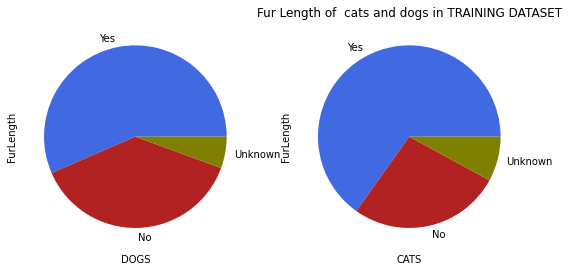

In [ ]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))  # 1 row, 2 columns
plt.title("Fur Length of  cats and dogs in TRAINING DATASET")
train_dog['FurLength'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax1,colors = ['royalblue', 'firebrick','olive'])
train_cat['FurLength'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax2,colors = ['royalblue', 'firebrick','olive'])
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

Let's define the column types:

In [ ]:
cat_cols = ['Type', 'Gender', 'Breed', 'Color1', 'Color2', 'Color3', 
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health']
num_cols = ['Age', 'Fee']
txt_cols = ['Description']
img_cols = ['Images']

And see the correlation between columns

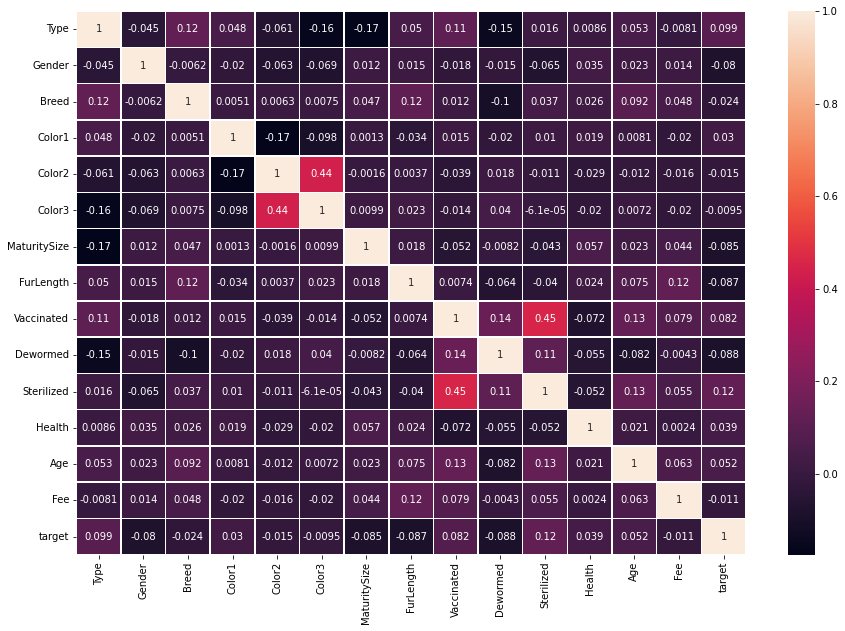

In [ ]:
cor_categorical= train[cat_cols+num_cols+ ['target']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sn.heatmap(cor_categorical, annot=True, linewidths=.5, ax=ax)

There is no significant correlation between columns, so we cannot remove any of them.

##10- Description column

#####Sentiment Analysis
######Step 1: Cleaning the text
In this step, we need to remove the special characters, numbers from the text. We can use the regular expression operations library of Python.

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

desc = train["Description"]
desc = desc.to_frame()
# Cleaning the text in the review column
desc['Cleaned Desc'] = desc['Description'].apply(clean)
desc.head(2)

,Description,Cleaned Desc
0,We got Luna when she was a kitten in Feb 15'. ...,We got Luna when she was a kitten in Feb She i...
1,Ginger Boy was found starving and hungry so I ...,Ginger Boy was found starving and hungry so I ...


Step 2: 

This step has various phases:
- Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.
- Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization). I will be performing word-level tokenization using nltk tokenize function word_tokenize().
- Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization. **This** can be achieved by using the nltk pos_tag function. 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

desc['POS tagged'] = desc['Cleaned Desc'].apply(token_stop_pos)
desc.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Description,Cleaned Desc,POS tagged
0,We got Luna when she was a kitten in Feb 15'. ...,We got Luna when she was a kitten in Feb She i...,"[(got, v), (Luna, n), (kitten, n), (Feb, n), (..."
1,Ginger Boy was found starving and hungry so I ...,Ginger Boy was found starving and hungry so I ...,"[(Ginger, n), (Boy, n), (found, v), (starving,..."
2,An indoor cat with nice green/ yellowish eyes....,An indoor cat with nice green yellowish eyes A...,"[(indoor, a), (cat, n), (nice, a), (green, a),..."
3,My dog name called boo. He is a male. I feedin...,My dog name called boo He is a male I feeding ...,"[(dog, n), (name, n), (called, v), (boo, n), (..."
4,"1) Foxy is a stray cat which I feed regularly,...",Foxy is a stray cat which I feed regularly sh...,"[(Foxy, n), (stray, a), (cat, n), (feed, v), (..."


*Step*-3: Lemmaziation

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')



def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

desc['Lemma'] = desc['POS tagged'].apply(lemmatize)
desc.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Description,Cleaned Desc,POS tagged,Lemma
0,We got Luna when she was a kitten in Feb 15'. ...,We got Luna when she was a kitten in Feb She i...,"[(got, v), (Luna, n), (kitten, n), (Feb, n), (...",get Luna kitten Feb calm friendly cat gentle...
1,Ginger Boy was found starving and hungry so I ...,Ginger Boy was found starving and hungry so I ...,"[(Ginger, n), (Boy, n), (found, v), (starving,...",Ginger Boy find starving hungry start feed r...
2,An indoor cat with nice green/ yellowish eyes....,An indoor cat with nice green yellowish eyes A...,"[(indoor, a), (cat, n), (nice, a), (green, a),...",indoor cat nice green yellowish eye first lo...
3,My dog name called boo. He is a male. I feedin...,My dog name called boo He is a male I feeding ...,"[(dog, n), (name, n), (called, v), (boo, n), (...",dog name call boo male feed around year
4,"1) Foxy is a stray cat which I feed regularly,...",Foxy is a stray cat which I feed regularly sh...,"[(Foxy, n), (stray, a), (cat, n), (feed, v), (...",Foxy stray cat fee regularly spay July spay ...



####STEP-4.1 Sentiment Analysis using TextBlob:
TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

The two measures that are used to analyze the sentiment are:

**Polarity** – talks about how positive or negative the opinion is

**Subjectivity** – talks about how subjective the opinion is

TextBlob(text).sentiment gives us the Polarity, Subjectivity values.
- Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
- Subjectivity ranges from 0 to 1(0 being very objective and 1 being very subjective)

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
fin_data = pd.DataFrame(desc[['Description', 'Lemma']])
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
print(fin_data.head())

tb_counts = fin_data.Analysis.value_counts()
tb_counts

                                         Description  ...  Analysis
0  We got Luna when she was a kitten in Feb 15'. ...  ...  Positive
1  Ginger Boy was found starving and hungry so I ...  ...  Positive
2  An indoor cat with nice green/ yellowish eyes....  ...  Positive
3  My dog name called boo. He is a male. I feedin...  ...   Neutral
4  1) Foxy is a stray cat which I feed regularly,...  ...  Negative

[5 rows x 5 columns]


Positive    6854
Neutral      836
Negative     478
Name: Analysis, dtype: int64

In [ ]:
fin_data.head()

,Description,Lemma,Subjectivity,Polarity,Analysis
0,We got Luna when she was a kitten in Feb 15'. ...,get Luna kitten Feb calm friendly cat gentle...,0.733333,0.179167,Positive
1,Ginger Boy was found starving and hungry so I ...,Ginger Boy find starving hungry start feed r...,0.570833,0.180587,Positive
2,An indoor cat with nice green/ yellowish eyes....,indoor cat nice green yellowish eye first lo...,0.475000,0.066667,Positive
3,My dog name called boo. He is a male. I feedin...,dog name call boo male feed around year,0.100000,0.000000,Neutral
4,"1) Foxy is a stray cat which I feed regularly,...",Foxy stray cat fee regularly spay July spay ...,0.225641,-0.166667,Negative


####STEP-4.2 Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.


The sum of pos, neg, neu intensities give 1. Compound ranges from -1 to 1 and is the metric used to draw the overall sentiment.

- positive if compound >= 0.5
- neutral if -0.5 < compound < 0.5
- negative if -0.5 >= compound

You should install vaderSentiment is it is not installed:

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
print(fin_data.columns)

vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Index(['Description', 'Lemma', 'Subjectivity', 'Polarity', 'Analysis',
       'Vader Sentiment', 'Vader Analysis'],
      dtype='object')


Positive    6610
Neutral     1486
Negative      72
Name: Vader Analysis, dtype: int64

####STEP-4.3 Sentiment Analysis using SentiWordNet
SentiWordNet uses the WordNet database. It is important to obtain the POS, lemma of each word. We will then use the lemma, POS to obtain the synonym sets(synsets). We then obtain the positive, negative, objective scores for all the possible synsets or the very first synset and label the text.

- if positive score > negative score, the sentiment is positive
- if positive score < negative score, the sentiment is negative
- if positive score = negative score, the sentiment is neutral

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
      if not pos:
          continue
      lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
      if not lemma:
          continue
      synsets = wordnet.synsets(lemma, pos=pos)
      if not synsets:
          continue
      # Take the first sense, the most common
      synset = synsets[0]
      swn_synset = swn.senti_synset(synset.name())
      sentiment += swn_synset.pos_score() - swn_synset.neg_score()
      tokens_count += 1
          # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
      if not tokens_count:
          return 0
      if sentiment>0:
          return "Positive"
      if sentiment==0:
          return "Neutral"
      else:
          return "Negative"

fin_data['SWN analysis'] = desc['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


Neutral     4999
Positive    2186
Negative     882
Name: SWN analysis, dtype: int64

Let's see the analysis of sentiment analysis and how many positive, negative and neutral description they create:

([<matplotlib.patches.Wedge at 0x7f7b1b61f550>,
 [Text(-0.4039250552248843, 1.0231542160210132, 'Neutral'),
  Text(0.03576336830547639, -1.0994184742341957, 'Positive'),
  Text(1.2711425269699266, -0.4546390613756258, 'Negative')],
 [Text(-0.22032275739539142, 0.5580841178296435, '62.0%'),
  Text(0.01950729180298712, -0.5996828041277431, '27.1%'),
  Text(0.8003489984625463, -0.2862542238290977, '10.9%')])

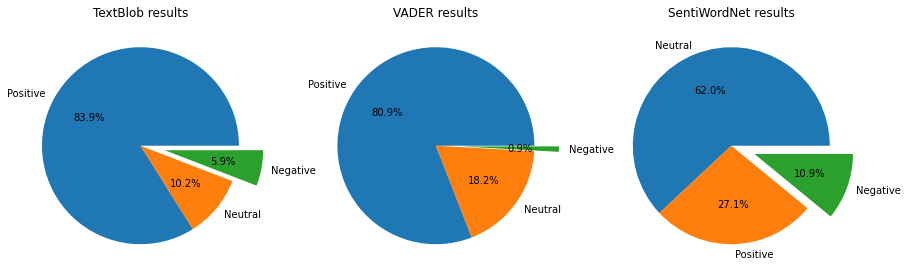

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
fin_data[['Subjectivity', 'Polarity', 'Analysis',
       'Vader Sentiment', 'Vader Analysis', 'SWN analysis']].head()

,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,0.733333,0.179167,Positive,0.8271,Positive,Positive
1,0.570833,0.180587,Positive,0.9382,Positive,Neutral
2,0.475000,0.066667,Positive,0.7845,Positive,Positive
3,0.100000,0.000000,Neutral,0.0000,Neutral,Neutral
4,0.225641,-0.166667,Negative,-0.0258,Neutral,Negative


##Load Train Data

In [37]:
path = "https://www.i3s.unice.fr/~riveill/dataset/petfinder-adoption-prediction/"

#LOAD TEST DATA
test = pd.read_csv(path+"test.csv")
test['dataset_type'] = 'test'
y_test = test['target']
X_test = test.drop(['target','dataset_type'], axis=1)

img_dir = "test_images/"
X_test['Images'] = [path+img_dir+img for img in test['Images']]
print("Test size:", len(X_test))

#LOAD TRAIN DATA
train =  pd.read_csv(path+'train.csv')
train['dataset_type'] = 'train'

y_train = train['target']
print(y_train.shape)
X_train = train.drop(['target','dataset_type'], axis=1)
print(X_train.columns)
print(X_train.shape)

img_dir = "train_images/"
X_train['Images'] = [path+img_dir+img for img in train['Images']]

Test size: 250
(8168,)
Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'Images', 'Breed'],
      dtype='object')
(8168, 16)


In [38]:
#X_train = X_train[:10]
#X_train.shape

##Image Column

Load the images:

In [86]:
# Build the image list of the training set 
img_dir = "train_images/"
X_train['Images'] = [path+img_dir+img for img in train['Images']]

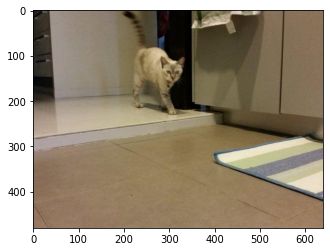

In [87]:
from skimage import io

# Read the first image of the list
img = io.imread(X_train['Images'][0])
# have a look to the image
plt.imshow(img)

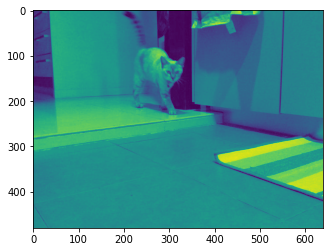

In [88]:
# convert the image to grey levels 
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### Compute SIFT detector and descriptors for one image

In [90]:
print(cv2.__version__)

4.4.0


In [91]:
# compute SIFT detector and descriptors
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)

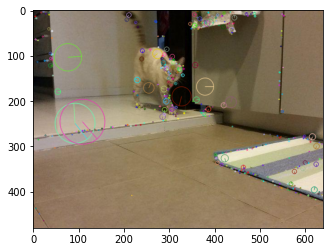

In [92]:
# plot image and descriptors
cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

### Extract features and build BOFs

In [93]:
# First step, extract the SIFTs of each image
# Be carefull: very long process

def extract_SIFT(img_lst):
    nbSIFTs = 0    # Nomber of SIFTs
    SIFTs = []  # List of SIFTs descriptors 
    #dimImgs = []   # Nb of descriptors associated to each images

    for pathImg in tqdm(img_lst, position=0, leave=True): 
        img = io.imread(pathImg)
        if len(img.shape)==2: # this is a grey level image
            gray = img
        else: # we expect the image to be a RGB image or RGBA
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(gray, None)
        if len(kp) == 0 and img.shape[2]==4: #some images are mask on alpha channel: we thus extract this channel if not kpts have been detected
            gray = img[:,:,3]
            sift = cv2.SIFT_create()
            kp, des = sift.detectAndCompute(gray, None)
        
        nbSIFTs += des.shape[0]
        SIFTs.append(des)
        #dimImgs.append(des.shape[0])
    return nbSIFTs, SIFTs#, dimImgs

In [94]:
nbSIFTs, SIFTs = extract_SIFT(X_train['Images'][0:1])
print('nbSifts: ', nbSIFTs)

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

nbSifts:  391


In [95]:
# Step 2: clusterize the SIFT
from sklearn.cluster import MiniBatchKMeans

def clusterize(SIFTs, nb_img_features=1, verbose=False):
    clusterizer = MiniBatchKMeans(n_clusters=nb_img_features)   # nb_img_features is a hyperparameter
    # learning of the clustering
    flat_list = SIFTs[0]
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des))
        #if verbose:
            #print("shape:", des.shape, flat_list.shape)
    clusterizer.fit(flat_list)
    # we now know the label of each SIFT descriptor
    return clusterizer

In [96]:
clusterizer = clusterize(SIFTs, verbose=True)

In [97]:
# Step 3: build the BOW representation of each images (i.e. construction of the BOFs)

def build_BOFs(SIFTs, clusterizer, verbose=False):
    ok, nok = 0, 0
    #BOF initialization
    nb_img_features = clusterizer.get_params()['n_clusters']
    BOFs = np.empty(shape=(0, nb_img_features), dtype=int)

    # Build label list
    flat_list = SIFTs[0]
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des))
        if verbose:
            print("shape:", des.shape, flat_list.shape)
    labels = clusterizer.predict(flat_list)

    # loop on images
    i = 0 # index for the loop on SIFTs
    for des in SIFTs:
        #initialisation of the bof for the current image
        tmpBof = np.array([0]*nb_img_features)
        j = 0
        # for every SIFT of the current image:
        nbs = des.shape[0]
        while j < nbs:
            tmpBof[labels[i]] += 1
            j+=1
            i+=1
        BOFs = np.concatenate((BOFs, tmpBof.reshape(1,-1)), axis=0)
    if verbose:
        print("BOFs : ", BOFs)
    
    return BOFs

In [98]:
BOFs = build_BOFs(SIFTs, clusterizer, verbose=True)
#BOFs.shape

BOFs :  [[391]]


In [99]:
from sklearn.base import BaseEstimator,TransformerMixin

  
def list_comparaison(l1, l2):
    if not l1 is None \
        and not l2 is None \
        and len(l1)==len(l2) \
        and len(l1)==sum([1 for i,j in zip(l1, l2) if i==j]):
        return True
    return False
    
class BOF_extractor(BaseEstimator,TransformerMixin): 
    X = None
    SIFTs = None
    nbSIFTs = 0
    
    def __init__(self, nb_img_features=1, verbose=False):
        self.nb_img_features = nb_img_features
        self.verbose = verbose
        self.path = path
        if self.verbose:
            print("BOF.init()")
        
    def fit(self, X, y=None):
        if self.verbose:
            print("BOF.fit()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        
    def transform(self, X, y=None):
        if self.verbose:
            print("BOF.transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)

        if self.verbose:
            print("nbSIFTs:", nbSIFTs)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)
    
    def fit_transform(self, X, y=None):
        if self.verbose:
            print("BOF.fit_transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)

In [100]:
#test_BOF_extractor = BOF_extractor(nb_img_features=5, verbose=True)

In [101]:
#test_BOF_extractor.fit(X_train['Images'])

In [102]:
#BOFs = test_BOF_extractor.transform(X_train['Images'])
#BOFs.shape

In [103]:
#BOFs = test_BOF_extractor.fit_transform(X_train['Images'])
#BOFs.shape

In [104]:
test = pd.read_csv(path+"test.csv")
y_test = test['target']
X_test = test.drop(['target'], axis=1)

img_dir = "test_images/"
X_test['Images'] = [path+img_dir+img for img in test['Images']]
len(X_test)

250

In [105]:
#BOFs = test_BOF_extractor.transform(X_test['Images'])
#BOFs.shape

#Machine Learning part

Before starting the ML part I would like to mention a problem. In the sample notebook that you gave at the beginning, you said that you will only execute the following cells:


- from joblib import dump, load

- test = pd.read_csv(path+"test.csv")

- y_test = test['target']
- X_test = test.drop(['target'], axis=1)
- img_dir = "test_images/"
- X_test['Images'] = [path+img_dir+img for img in test['Images']]
- model = load('michel.joblib') 
- y_pred = model.predict(X_train)
- print("ACC on train", accuracy_score(y_train, y_pred))
- y_pred = model.predict(X_test)
- print("ACC on test", accuracy_score(y_test, y_pred))


Here, the model is loaded with joblib library. My joblib file is 2.7 GB and when I load the model with this lines of code, some of the functions are not loaded. For example I added 3 functions to my pipeline with FunctionTransform: descriptipon word count, description sentiment analysis and color count.

These extra functions are not loaded when I only run the above lines. I searched on the internet about this problem. It seems when I dump the model, it only saves the extra funtions' names, not their body. So, the function bodies are not saved in the joblib file and gives an error.

However, when I run the cells that have the function implementations and load the model, they execute without an error.
I mean, if you run this all notebook and load my model at the end, you will not have problem. I hope I could explain the problem that I encounter well. 
Thank you :)

## Evaluation of the model

<div class="alert alert-block alert-danger">
We will only execute the following cells.
</div>

In [111]:

path = "https://www.i3s.unice.fr/~riveill/dataset/petfinder-adoption-prediction/"

#LOAD TEST DATA
test = pd.read_csv(path+"test.csv")
test['dataset_type'] = 'test'
y_test = test['target']
X_test = test.drop(['target','dataset_type'], axis=1)

img_dir = "test_images/"
X_test['Images'] = [path+img_dir+img for img in test['Images']]
print("Test size:", len(X_test))

#LOAD TRAIN DATA
train =  pd.read_csv(path+'train.csv')
train['dataset_type'] = 'train'

y_train = train['target']
X_train = train.drop(['target','dataset_type'], axis=1)


img_dir = "train_images/"
X_train['Images'] = [path+img_dir+img for img in train['Images']]

'''
#This is example execution:
model = load('michel.joblib') 
y_pred = model.predict(X_train)
print("ACC on train", accuracy_score(y_train, y_pred))
y_pred = model.predict(X_test)
print("ACC on test", accuracy_score(y_test, y_pred))
'''


Test size: 250


'\n#This is example execution:\nmodel = load(\'michel.joblib\') \ny_pred = model.predict(X_train)\nprint("ACC on train", accuracy_score(y_train, y_pred))\ny_pred = model.predict(X_test)\nprint("ACC on test", accuracy_score(y_test, y_pred))\n'

#PIPELINE

In [116]:
#Extra functions that is in Pipeline

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline,make_pipeline
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from numpy import mean,std,absolute
from pandas import read_csv
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score,KFold
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer



#This function is for sentiment analysis for Description column. Inside it there are 
#three sentiment analysis technique (Textblob, Vader, SWN Analysis). The function inside the
# "transform_desc(desc)" is the same function above in Description column data analysis.
def transform_desc(desc):
  import re
  import nltk
  nltk.download('punkt')
  from nltk.tokenize import word_tokenize
  from nltk import pos_tag
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  nltk.download('wordnet')
  from nltk.corpus import wordnet
  nltk.download('averaged_perceptron_tagger')

  from nltk.stem import WordNetLemmatizer
  wordnet_lemmatizer = WordNetLemmatizer()
  nltk.download('wordnet')

  
  def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
  #Step-1: Cleaning the text
  desc['Cleaned Desc'] = desc['Description'].apply(clean)


  #Step-2: Stopwords removal, Tokenization, POS tagging
  pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
  def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
  desc['POS tagged'] = desc['Cleaned Desc'].apply(token_stop_pos)


  #Step-3: Lemmaziation
  def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
  desc['Lemma'] = desc['POS tagged'].apply(lemmatize)
  fin_data = pd.DataFrame(desc[['Description', 'Lemma']])

  #STEP-4.1 Sentiment Analysis using TextBlob:
  from textblob import TextBlob
  # function to calculate subjectivity
  def getSubjectivity(review):
      return TextBlob(review).sentiment.subjectivity

  # function to calculate polarity
  def getPolarity(review):
    return TextBlob(review).sentiment.polarity

  # function to analyze the reviews
  def analysis(score):
      if score < 0:
          return 'Negative'
      elif score == 0:
          return 'Neutral'
      else:
          return 'Positive'
  fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
  fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
  fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
  return fin_data[['Subjectivity',	'Polarity']]
  
  
  #STEP-4.2 Sentiment Analysis using VADER:
  #fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
  #fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
  #return fin_data[['Vader Analysis']]

  #STEP-4.3 Sentiment Analysis using SentiWordNet:
  #fin_data['SWN analysis'] = desc['POS tagged'].apply(sentiwordnetanalysis)
  #return fin_data[['SWN analysis']]


get_transformed_description = FunctionTransformer(transform_desc, validate=False)


#This function is for counting the number of words in Description column and add it to the data frame(X_train)
def description_word_count(desc):
  fin_data = pd.DataFrame(desc)
  #print("-->",fin_data.head())
  fin_data['Desc_word_count'] = 0
  for i in range(len(fin_data['Description'])):
    fin_data['Desc_word_count'][i]= len(fin_data['Description'][i])
  #print("bitti")
  #print(fin_data[['Desc_word_count']])
  return fin_data[['Desc_word_count']]

get_desc_word_count = FunctionTransformer(description_word_count, validate=False)

#Get Color count of a pet:
def color_count(df):
  df = pd.DataFrame(df)
  colorss=['White', 'Cream', 'Gray', 'Golden', 'Yellow','Black','Brown']
  df['color_count'] = 0
  for i in range(len(df['Color1'])):
    count=0
    if df['Color1'][i] in colorss:
      count=count+1
    if df['Color2'][i] in colorss:
      count=count+1
    if df['Color3'][i] in colorss:
      count=count+1
    df['color_count'][i] = count
  
  return df[['color_count']]



get_color_count = FunctionTransformer(color_count, validate=False)



In [117]:
############# PIPELINE
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline,make_pipeline
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.compose import make_column_selector as selector
from numpy import mean,std,absolute
from pandas import read_csv
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score,KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import random_projection
from sklearn import datasets, cluster


Nominal_cat_cols2 = ['Type', 'Gender', 'Breed', 'Color1', 'Color2', 'Color3',
                     'FurLength', 'Vaccinated', 'Dewormed','Sterilized','Health']
Ordinal_cat_cols2 = ['MaturitySize']
num_cols = ['Age', 'Fee']
text_column = ['Description']

image_preprocessor = BOF_extractor(nb_img_features=1, verbose=False)

#-------------------------------
numeric_transformer = Pipeline(steps=[
    ('scaler1', StandardScaler())
    ])
ordinal_transformer = Pipeline(steps=[                                 
    ("ord1", OrdinalEncoder( categories=[['Medium', 'Large', 'Small', 'Extra Large']])),
    ])
nominal_transformer = Pipeline(steps=[
    ("onehot1", OneHotEncoder(handle_unknown="ignore",sparse=False )),
    ])
text_transformer = Pipeline(steps=[
    ('description transfomer', get_transformed_description),
    #("ord1", OrdinalEncoder( categories=[['Positive', 'Negative', 'Neutral',None]])),
    ])
word_count_transformer = Pipeline(steps=[
    ('word count transfomer', get_desc_word_count ),
    ('scaler2', StandardScaler())
    ])
color_count_transformer = Pipeline(steps=[
    ('color count transfomer', get_color_count ),
    ])

preprocessor = ColumnTransformer(transformers=[
    ("image encoding", image_preprocessor, 'Images'),
    ('numeric_transformer', numeric_transformer, num_cols),
    ('ordinal_transformer', ordinal_transformer, Ordinal_cat_cols2),
    ('nominal_transformer', nominal_transformer, Nominal_cat_cols2),
    ('text_transformer', text_transformer, text_column),
    ('add word count of description', word_count_transformer, text_column),
    ('add color count', color_count_transformer, ['Color1', 'Color2', 'Color3']),
    
])
#-------------------------------
#Dimension reduction methods:


feature_selector_PCA = FeatureUnion([
                                  ("pca", PCA(n_components=0.95))
                                  ])

feature_selector_FeatureAgglomeration = FeatureUnion([
                                  ("FeatureAgglomeration", cluster.FeatureAgglomeration(n_clusters=0.95))
                                  ])
#--------------------------------------#--------------------------------------#


I fit_transform the models before fit it to classifier to gain time:

In [ ]:
#Pipeline without PCA and without FeatureAgglomeration
#I use this model in my pipeline in Randon Forest because this model gives me the best accuracy.
model21 = make_pipeline(preprocessor)
preprocessor_X_train = model21.fit_transform(X_train)
print("preprocessor X_train.shape=",preprocessor_X_train.shape)


In [ ]:
#Pipeline With PCA. I don't use this because PCA decreased the accuracy
model22 = make_pipeline(preprocessor, feature_selector_PCA)
#preprocessor_pca_X_train= model22.fit_transform(X_train)
#print("preprocessor + PCA, X_train.shape=",preprocessor_pca_X_train.shape)

In [ ]:
#Pipeline with FeatureAgglomeration. I don't use this because FeatureAgglomeration decreased the accuracy
model23 = make_pipeline(preprocessor, feature_selector_FeatureAgglomeration)
#preprocessor_FeatureAgglomeration_X_train= model23.fit_transform(X_train)
#print("preprocessor + FeatureAgglomeration, X_train.shape=",preprocessor_FeatureAgglomeration_X_train.shape)

In [ ]:
#Display the model
from sklearn import set_config

set_config(display="diagram")
model21



#RANDOM FOREST

Random Forest is my best model. The best hyper-parameters are given below. The other classifiers are commented below, they cannot run.

In [81]:
import builtins
#Random Forest
'''
#Parameter searching:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : [4,5,6,7,8,10,20],
     'criterion' :['gini', 'entropy']
}'''

#Best parameters:
param_grid = { 
'n_estimators': [500],
'max_features': ['sqrt'],
'max_depth' : [20],
'criterion' :['gini']
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
print(grid)


grid.fit(preprocessor_X_train, y_train)
#grid.fit(preprocessor_pca_X_train, y_train)
#grid.fit(preprocessor_FeatureAgglomeration_X_train, y_train)


clf_best = grid.best_estimator_
print(clf_best)

final_pipe = Pipeline([('1.', model21), ('model', clf_best)])
#final_pipe = Pipeline([('1.', model22), ('model', clf_best)])
#final_pipe = Pipeline([('1.', model23), ('model', clf_best)])


########### LOAD MODEL
# Save the model
from joblib import dump, load



dump(final_pipe, 'cem_rand_forest_finalimage.joblib') # Put your name as a model name

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [20],
                         'max_features': ['sqrt'], 'n_estimators': [500]})
RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500)


['cem_rand_forest_final.joblib']

In [ ]:
clf_best.get_params()

In [ ]:
#Mounting Google Drive to use it. This cell is for me to manupilate files between Drive and Google Colab
'''
from google.colab import drive
drive.mount('/content/drive')

#Move a file from Colab to Drive
%cp -av "/content/cem_rand_forest_withoutImage2.joblib" "/content/drive/MyDrive"
'''


In [82]:
#Load the model:
from joblib import dump, load

model = load('/content/cem_rand_forest.joblib')


#Display the model
from sklearn import set_config
set_config(display="diagram")
model

Pipeline(steps=[('1.',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('numeric_transformer',
                                                                   Pipeline(steps=[('scaler1',
                                                                                    StandardScaler())]),
                                                                   ['Age',
                                                                    'Fee']),
                                                                  ('ordinal_transformer',
                                                                   Pipeline(steps=[('ord1',
                                                                                    OrdinalEncoder(categories=[['Medium',
                                                                                                                'Large',
                                                                                                                'Small',
                                                                                                                'Extra '
                                                                                                                'Large']]))]),
                                                                   ['MaturitySize']),
                                                                  ('nominal_transformer',
                                                                   Pipeline(ste...
                                                                                    FunctionTransformer(func=<function description_word_count at 0x7fbfc58a3440>)),
                                                                                   ('scaler2',
                                                                                    StandardScaler())]),
                                                                   ['Description']),
                                                                  ('add color '
                                                                   'count',
                                                                   Pipeline(steps=[('color '
                                                                                    'count '
                                                                                    'transfomer',
                                                                                    FunctionTransformer(func=<function color_count at 0x7fbfc58a3950>))]),
                                                                   ['Color1',
                                                                    'Color2',
                                                                    'Color3'])]))])),
                ('model',
                 RandomForestClassifier(max_depth=20, max_features='sqrt',
                                        n_estimators=500))])

In [ ]:

# -- Random Forest 
#LOAD MODEL 
from joblib import dump, load

#model = load('cem_rand_forest_son.joblib') 
print(model)

#It takes a lot to predict X_train.
y_pred = model.predict(X_train)
print("ACC on train", accuracy_score(y_train, y_pred))

y_pred = model.predict(X_test)
print("ACC on test", accuracy_score(y_test, y_pred))



#Below, you can find other classifier trials. They are in comments.

#DECISION TREE

In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier

#Decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,20,50,100,200]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
print(grid)


grid.fit(preprocessor_X_train, y_train)
#grid.fit(preprocessor_pca_X_train, y_train)


clf_best = grid.best_estimator_
print(clf_best)

#final_pipe = Pipeline([('1.', model22), ('model', clf_best)])
final_pipe = Pipeline([('1.', model21), ('model', clf_best)])


########### LOAD MODEL
# Save the model
from joblib import dump, load

dump(final_pipe, 'cem_decision_tree.joblib') # Put your name as a model name
'''

In [ ]:
#clf_best.get_params()

In [ ]:
'''
# -- Desision Tree 
#LOAD MODEL 

model = load('cem_decision_tree.joblib') 
print(model)
print(X_train.shape)
y_pred = model.predict(X_train)
print("ACC on train", accuracy_score(y_train, y_pred))
print(X_test.shape)
y_pred = model.predict(X_test)
print("ACC on test", accuracy_score(y_test, y_pred))

'''


#SVC

In [ ]:
'''
#SVC
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1.0,10,100],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, cv=10)
print(grid)


#grid.fit(preprocessor_X_train, y_train)
#grid.fit(preprocessor_pca_X_train, y_train)


#clf_best = grid.best_estimator_
#print(clf_best)

#final_pipe = Pipeline([('1.', model22), ('model', clf_best)])
#final_pipe = Pipeline([('1.', model21), ('model', clf_best)])


########### LOAD MODEL
# Save the model
from joblib import dump, load

#dump(final_pipe, 'cem_SVC.joblib') # Put your name as a model name
'''

In [ ]:
#clf_best.get_params()

In [ ]:
'''
# -- SVC
#LOAD MODEL 

model = load('cem_SVC.joblib') 
print(model)
print(X_train.shape)
y_pred = model.predict(X_train)
print("ACC on train", accuracy_score(y_train, y_pred))
print(X_test.shape)
y_pred = model.predict(X_test)
print("ACC on test", accuracy_score(y_test, y_pred))
'''


#LOGISTIC REGRESSION

In [ ]:
'''
#LOGISTIC REGRESSION 
param_grid = {
    "C": [0.01, 0.1, 1.0, 10, 100],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l1','l2']
    
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=10)
print(grid)


grid.fit(preprocessor_X_train, y_train)
#grid.fit(preprocessor_pca_X_train, y_train)


clf_best = grid.best_estimator_
print(clf_best)

#final_pipe = Pipeline([('1.', model22), ('model', clf_best)])
final_pipe = Pipeline([('1.', model21), ('model', clf_best)])


########### LOAD MODEL
# Save the model
from joblib import dump, load

dump(final_pipe, 'cem_log_reg.joblib') # Put your name as a model name
'''

In [ ]:
#clf_best.get_params()

In [ ]:
'''
# -- Logistic regression 
#LOAD MODEL 

model = load('cem_log_reg.joblib') 
print(model)
print(X_train.shape)
y_pred = model.predict(X_train)
print("ACC on train", accuracy_score(y_train, y_pred))
print(X_test.shape)
y_pred = model.predict(X_test)
print("ACC on test", accuracy_score(y_test, y_pred))

'''


#K-MEANS

In [ ]:
'''
#K-MEANS
param_grid = {
    "max_iter": [300, 500],
    "n_clusters" : [2],
    "init" : ['k-means++', 'random']
}


grid = GridSearchCV(KMeans(), param_grid, cv=10)
print(grid)


grid.fit(preprocessor_X_train, y_train)
#grid.fit(preprocessor_pca_X_train, y_train)


clf_best = grid.best_estimator_
print(clf_best)

#final_pipe = Pipeline([('1.', model22), ('model', clf_best)])
final_pipe = Pipeline([('1.', model21), ('model', clf_best)])


########### LOAD MODEL
# Save the model
from joblib import dump, load

dump(final_pipe, 'cem_kmeans.joblib') # Put your name as a model name
'''

In [ ]:
#clf_best.get_params()

In [ ]:
'''
# -- Kmeans 
#LOAD MODEL 

model = load('cem_kmeans.joblib') 
print(model)
print(X_train.shape)
y_pred = model.predict(X_train)
print("ACC on train", accuracy_score(y_train, y_pred))
print(X_test.shape)
y_pred = model.predict(X_test)
print("ACC on test", accuracy_score(y_test, y_pred))

'''
